# Example notebook for Ensemble Timesereies  

##### This notebook demonsterates how the ensemble module can be used for 1D timesereies data from a single ensemble or multi-model ensemble memebers

In [1]:
import xarray as xr
import glob
from aqua.diagnostics import EnsembleTimeseries
from aqua.diagnostics import PlotEnsembleTimeseries
from aqua.diagnostics import merge_from_data_files

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
# loading the paths of the data:
# Monthly timeseries data 
mon_file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_*_historical-1990_mon.nc')
# sorting the list because we want to assign the name to the models
mon_file_list.sort() 
# Annual timeseries data
ann_file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_*_historical-1990_ann.nc')
# sorting the list because we want to assign the name to the models
ann_file_list.sort()

In [3]:
# # Example:
# Reteriveing and merging the datasets in monthly and annual ensembles with given 'startdate' and 'enddate'
# Monthly:
# mon_model_dataset = merge_from_data_files(variable='2t', startdate='1990-01-01', enddate='1999-12-31', data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# Annual:
# ann_model_dataset = merge_from_data_files(variable='2t', startdate='1990-01-01', enddate='1999-12-31', data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [4]:
# # Example:
# # Without assigning names to the models 
# # Reteriveing and merging the datasets in monthly and annual ensembles 
# # Monthly:
# mon_model_dataset = merge_from_data_files(variable='2t', data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# # Annual:
# ann_model_dataset = merge_from_data_files(variable='2t', data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [5]:
# Assiging names to each model in the following function
# Reteriveing and merging the datasets in monthly and annual ensembles
# Monthly:
mon_model_dataset = merge_from_data_files(variable='2t', model_names= ['IFS-FESOM', 'IFS-NEMO'], data_path_list=mon_file_list, loglevel = "WARNING",ens_dim="ensemble")
# Annual:
ann_model_dataset = merge_from_data_files(variable='2t', model_names= ['IFS-FESOM', 'IFS-NEMO'], data_path_list=ann_file_list, loglevel = "WARNING",ens_dim="ensemble")

In [6]:
# loading the reference data as xarrays
variable='2t'

# Monthly reference data
ERA5_mon = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc'
mon_ref_data = xr.open_dataset(ERA5_mon,
                              drop_variables=[var for var in xr.open_dataset(ERA5_mon).data_vars if var != variable])
# selection ERA5 data on the same time interval -> xarray.DataArray 
mon_ref_data = mon_ref_data[variable].sel(time=slice(mon_model_dataset.time[0],mon_model_dataset.time[-1]))

# Annual reference data
ERA5_ann = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc'
ann_ref_data = xr.open_dataset(ERA5_ann,
                              drop_variables=[var for var in xr.open_dataset(ERA5_ann).data_vars if var != variable])
# selection ERA5 data on the same time interval -> xarray.DataArray 
ann_ref_data = ann_ref_data[variable].sel(time=slice(ann_model_dataset.time[0],ann_model_dataset.time[-1]))

In [7]:
# path on Lumi 
# ERA5 monthly data: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc
# ERA5 annual data: pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc

# IFS-NEMO monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_mon.nc 
# IFS-NEMO annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc

# IFS-FESOM monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_mon.nc
# IFS-FESOM annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_ann.nc

In [8]:
# Check if we need monthly and annual time variables
ts = EnsembleTimeseries(                                                                               
    var=variable,
    model_list=['IFS-FESOM', 'IFS-NEMO'],
    monthly_data=mon_model_dataset,                                                                      
    annual_data=ann_model_dataset,                                                                        
    outputdir='./',
    loglevel='WARNING',
)   
                 
# Compute statistics and save the results as netcdf                                                    
ts.run()  

In [9]:
# PlotEnsembleTimeseries class                                                                         
plot_class_arguments = {                                                                                     
    "model_list": ['IFS-FESOM', 'IFS-NEMO'],
    "ref_model": 'ERA5',
}

ts_plot = PlotEnsembleTimeseries(                                                                      
    **plot_class_arguments,   
    loglevel='WARNING',
)  

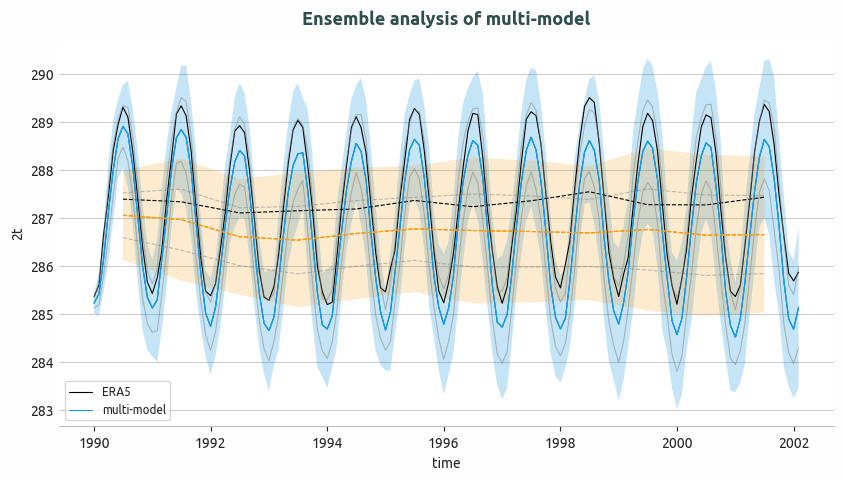

In [10]:
plot_arguments = {    "var": variable,
    "save_pdf": True,
    "save_png": True,
    "plot_ensemble_members": True,
    "monthly_data": ts.monthly_data,                                                                      
    "monthly_data_mean": ts.monthly_data_mean,                                                            
    "monthly_data_std": ts.monthly_data_std,                                                              
    "annual_data": ts.annual_data,
    "annual_data_mean": ts.annual_data_mean,                                                              
    "annual_data_std": ts.annual_data_std,
    "ref_monthly_data": mon_ref_data,
    "ref_annual_data": ann_ref_data,}

ensemble_plot = ts_plot.plot(**plot_arguments)

In [11]:
ts.monthly_data_mean

<xarray.DataArray '2t' (time: 146)> Size: 1kB
array([285.22611984, 285.42223789, 286.12072578, 287.11728608,
       287.99205117, 288.65033619, 288.9039013 , 288.74584238,
       288.05319782, 287.06247169, 285.99608582, 285.34716424,
       285.12460429, 285.2913749 , 286.13452351, 287.05399721,
       287.99477057, 288.66574403, 288.8356039 , 288.67195663,
       288.00332364, 286.93607294, 285.83656288, 285.01448537,
       284.74110584, 285.13893071, 285.895201  , 286.83434068,
       287.60132929, 288.16829043, 288.40114518, 288.29158384,
       287.55246776, 286.42329931, 285.43836125, 284.80748473,
       284.65550146, 284.9368791 , 285.6448374 , 286.62347563,
       287.51704037, 288.08823529, 288.33252998, 288.35098012,
       287.56510572, 286.52335453, 285.43131631, 284.77324327,
       284.68738336, 284.95740853, 285.7863694 , 286.7226057 ,
       287.56523662, 288.17663629, 288.54864914, 288.38317624,
       287.79041703, 286.70149354, 285.73253937, 285.04566284,
       284.66482084, 285.0431783 , 285.85488637, 286.79082157,
       287.76093   , 288.41709084, 288.6334382 , 288.51120552,
       287.83123949, 286.82474312, 285.77876033, 285.13471099,
       284.78742251, 285.13124123, 285.78739201, 286.92084653,
       287.74732297, 288.31070103, 288.6086472 , 288.51007073,
       287.8392702 , 286.78376363, 285.5790126 , 284.83068064,
       284.7263086 , 284.98979992, 285.79622937, 286.83330583,
       287.74119048, 288.40332456, 288.67904912, 288.41438018,
       287.75778242, 286.74068663, 285.58165964, 284.92943224,
       284.68936479, 284.91600335, 285.68483538, 286.73918013,
       287.69624075, 288.37055406, 288.60865082, 288.41054426,
       287.77385773, 286.59117418, 285.67762226, 285.06074091,
       284.78973397, 285.23906792, 285.85849045, 286.92918625,
       287.75783799, 288.38351146, 288.59500465, 288.44761982,
       287.80297524, 286.70886502, 285.73411102, 284.86094233,
       284.57062562, 284.90994943, 285.74826661, 286.79780331,
       287.73032668, 288.28251168, 288.56068883, 288.46567813,
       287.66778227, 286.7119131 , 285.46448836, 284.76425145,
       284.51672401, 284.90531808, 285.63324606, 286.62234854,
       287.54482162, 288.26670453, 288.63180444, 288.48150937,
       287.80914213, 286.84497521, 285.67473282, 284.89419727,
       284.68511267, 285.13836823])
Coordinates:
  * time     (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
Attributes:
    AQUA diagnostic:  EnsembleTimeseries
    AQUA catalog:     ['ensemble_catalog']
    model:            ['IFS-FESOM', 'IFS-NEMO']
    experiment:       ['ensemble_exp']
    description:      ensemble EnsembleTimeseries for ['ensemble_catalog'] an...